## Finding and deleting outliers using the Z-Score

#### The Z-score value gives an idea of how far a data point is from the Mean. It is also known as the Standard Score.

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# importing dataset
df=pd.read_csv('heights.csv')
df.head()

,gender,height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796


In [3]:
df.shape

(10000, 2)

(array([   5.,   18.,   66.,  152.,  322.,  604.,  870., 1036., 1117.,
        1079., 1108., 1059.,  891.,  721.,  510.,  255.,  120.,   43.,
          19.,    5.]),
 array([54.26313333, 55.49991378, 56.73669423, 57.97347468, 59.21025513,
        60.44703559, 61.68381604, 62.92059649, 64.15737694, 65.39415739,
        66.63093784, 67.86771829, 69.10449874, 70.34127919, 71.57805964,
        72.81484009, 74.05162055, 75.288401  , 76.52518145, 77.7619619 ,
        78.99874235]),
 <BarContainer object of 20 artists>)

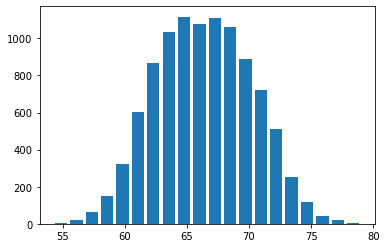

In [4]:
# plotting histogram of the data
plt.hist(df.height, bins=20, rwidth=0.8)

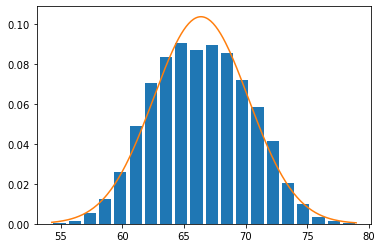

In [5]:
# plotting bell curve
from scipy.stats import norm
rng= np.arange(df.height.min(), df.height.max(), 0.1)
plt.hist(df.height, bins=20, rwidth=0.8, density=True) # density=True will show the bell curve on the histplot
plt.plot(rng, norm.pdf(rng, df.height.mean(), df.height.std()))

#### To calculate the Z-score, we need to know the Mean and Standard deviation of the data distribution. The formula for the Z-score is:

## Z = (X - mean) / Standard Deviation
#### Here, X is an individual data value in the distribution.

#### The further away a data value’s Z-score is from zero, the more unusual it is.

In [6]:
df['z_score'] = (df.height-df.height.mean())/df.height.std()
df.head()

,gender,height,z_score
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375


#### A standard cut-off value for finding outliers are Z-scores of +/-3 or further from zero. So any value with a Z-score of less than -3 and more than +3 can be considered an outlier.

In [7]:
# finding lower limit outlier values
min_limit = df[df.z_score<-3]
min_limit

,gender,height,z_score
6624,Female,54.616858,-3.054091
9285,Female,54.263133,-3.146027


In [8]:
# finding upper limit outlier values
max_limit=df[df.z_score>3]
max_limit

,gender,height,z_score
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854


In [11]:
# displaying all outliers
df[(df.z_score<-3) | (df.z_score>3)]

,gender,height,z_score
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854
6624,Female,54.616858,-3.054091
9285,Female,54.263133,-3.146027


In [9]:
# obtaining dataset without outliers
df2=df[(df.z_score>-3) & (df.z_score<3)]
df2.shape

(9993, 3)